In [1]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pl.read_csv('data/StudentPerformanceFactors.csv')

display(len(df))
df = df.with_columns(
    pl.when(pl.col("Parental_Involvement") == "High").then(1)
    .when(pl.col("Parental_Involvement") == "Medium").then(0.5)
    .when(pl.col("Parental_Involvement") == "Low").then(0)
    .otherwise(None)  
    .alias("Parental_Involvement") )

df = df.with_columns(pl.when(pl.col('Learning_Disabilities') == 'yes').then(1).otherwise(0).alias('Learning_Disabilities'))
df = df.with_columns(pl.when(pl.col('Family_Income') == 'Low').then(0).when(pl.col('Family_Income') == 'High').then(1).otherwise(0.5).alias('Family_Income'))
df = df.with_columns(pl.when(pl.col('Motivation_Level') == 'Low').then(0).when(pl.col('Motivation_Level') == 'High').then(1).otherwise(0.5).alias('Motivation_Level'))

df = df.with_columns(pl.when(pl.col('Parental_Education_Level') == None).then(0).when(pl.col('Parental_Education_Level') == 'College').then(0.5).otherwise(1).alias('Parental_Education_Level'))
df = df.with_columns(pl.when(pl.col('Gender') == 'Male').then(0).otherwise(1).alias('Gender'))
df = df.with_columns(pl.when(pl.col('School_Type') == 'Public').then(0).otherwise(1).alias('School_Type'))
df = df.with_columns(pl.when(pl.col('Teacher_Quality') == 'Medium').then(0.5).when(pl.col('Teacher_Quality') == "High").then(1).otherwise(0).alias('Teacher_Quality'))
df = df.with_columns(pl.when(pl.col('Extracurricular_Activities') == 'yes').then(1).otherwise(0).alias('Extracurricular_Activities'))
df = df.with_columns(pl.when(pl.col('Access_to_Resources') == 'Medium').then(0.5).when(pl.col('Access_to_Resources') == "High").then(1).otherwise(0).alias('Access_to_Resources'))
df = df.with_columns(pl.when(pl.col('Peer_Influence') == 'Positive').then(1).otherwise(0).alias('Peer_Influence'))
df = df.with_columns(pl.when(pl.col('Internet_Access') == 'Yes').then(1).otherwise(0).alias('Internet_Access'))
df = df.with_columns(pl.when(pl.col('Distance_from_Home') == 'Near').then(1).when(pl.col('Distance_from_Home') == 'Moderate').then(0.5).otherwise(0).alias('Distance_from_Home'))
df.head()

6607

/tmp/ipykernel_12494/3088908621.py:15: UserWarning: Comparisons with None always result in null. Consider using `.is_null()` or `.is_not_null()`.
  df = df.with_columns(pl.when(pl.col('Parental_Education_Level') == None).then(0).when(pl.col('Parental_Education_Level') == 'College').then(0.5).otherwise(1).alias('Parental_Education_Level'))


Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
i64,i64,f64,f64,i32,i64,i64,f64,i32,i64,f64,f64,i32,i32,i64,i32,f64,f64,i32,i64
23,84,0.0,1.0,0,7,73,0.0,1,0,0.0,0.5,0,1,3,0,1.0,1.0,0,67
19,64,0.0,0.5,0,8,59,0.0,1,2,0.5,0.5,0,0,4,0,0.5,0.5,1,61
24,98,0.5,0.5,0,7,91,0.5,1,2,0.5,0.5,0,0,4,0,1.0,1.0,0,74
29,89,0.0,0.5,0,8,98,0.5,1,1,0.5,0.5,0,0,4,0,1.0,0.5,0,71
19,92,0.5,0.5,0,6,65,0.5,1,3,0.5,1.0,0,0,4,0,0.5,1.0,1,70


### parent_Education_Level, techer_Quality, Family_Income, Motivation_Level, Extracurricular_activities, Parental_involvement



In [3]:
Y = df['Exam_Score']
X = df.drop(pl.col('Exam_Score'))
display(Y.head())
display(X.head())

Exam_Score
i64
67
61
74
71
70
71
67
66
69


Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
i64,i64,f64,f64,i32,i64,i64,f64,i32,i64,f64,f64,i32,i32,i64,i32,f64,f64,i32
23,84,0.0,1.0,0,7,73,0.0,1,0,0.0,0.5,0,1,3,0,1.0,1.0,0
19,64,0.0,0.5,0,8,59,0.0,1,2,0.5,0.5,0,0,4,0,0.5,0.5,1
24,98,0.5,0.5,0,7,91,0.5,1,2,0.5,0.5,0,0,4,0,1.0,1.0,0
29,89,0.0,0.5,0,8,98,0.5,1,1,0.5,0.5,0,0,4,0,1.0,0.5,0
19,92,0.5,0.5,0,6,65,0.5,1,3,0.5,1.0,0,0,4,0,0.5,1.0,1


In [4]:
import numpy as np


columns_ = X.columns
correaltion_Exam = np.ones(len(columns_))


for i in range(len(columns_)):
    print(type(df.select(pl.corr('Exam_Score', columns_[i])).to_numpy().astype('float')))
    correaltion_Exam[i] = df.select(pl.corr('Exam_Score', columns_[i])).to_numpy().astype('float')
correaltion_Exam.reshape(-1,1)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/tmp/ipykernel_12494/3543985388.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correaltion_Exam[i] = df.select(pl.corr('Exam_Score', columns_[i])).to_numpy().astype('float')


array([[ 0.44545495],
       [ 0.58107186],
       [ 0.15711419],
       [ 0.16977013],
       [        nan],
       [-0.01702163],
       [ 0.17507909],
       [ 0.08693746],
       [ 0.05147501],
       [ 0.15652519],
       [ 0.09455499],
       [ 0.07794685],
       [ 0.00884355],
       [ 0.08121683],
       [ 0.02782444],
       [        nan],
       [-0.0135093 ],
       [ 0.09314801],
       [ 0.00203233]])

<Axes: >

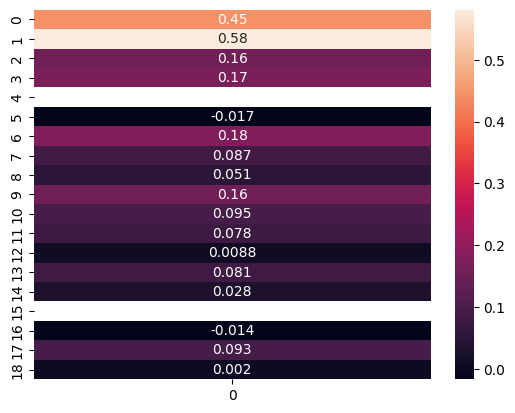

In [5]:

sns.heatmap(correaltion_Exam.reshape(19,-1), annot= True)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
model_linearregression = LinearRegression()

In [8]:
model_linearregression.fit(X_train,Y_train)

Y_pred = model_linearregression.predict(X_test)
print(Y_pred[:100])
print(r2_score(Y_pred, Y_test))

[65.46049692 65.07295012 70.50694184 64.27539451 66.13318449 66.37843089
 72.44780353 66.15960515 69.0149382  69.82040285 65.8063458  72.34721446
 66.99730364 63.42938388 64.71695106 63.46898561 64.08094623 73.87962304
 66.06457634 69.14848384 67.65979939 70.47898422 61.73569973 63.01604355
 66.23236337 74.21438732 70.09649027 70.67062422 62.57699679 71.21902161
 69.90312737 65.37288019 67.37176687 56.29174016 64.79978851 65.77440292
 70.81185393 69.78214649 67.10376443 69.96276619 64.70933523 66.06466125
 67.151662   65.32700683 63.79897006 66.77577476 64.07835068 70.20849472
 68.74916396 73.54807142 61.14804053 66.37514163 61.99973099 69.07850441
 69.39108379 60.74560935 63.74702143 68.09502763 66.78493098 69.96147442
 72.03221562 73.22254126 67.14472464 66.71059742 61.35706112 64.7710477
 74.84073472 65.77359827 67.23393006 70.81100007 62.33237318 67.06352972
 65.08860539 69.90088405 72.26806447 64.61768639 64.98829476 67.20238194
 64.13379451 69.83511544 62.86733598 65.26672675 73.

In [9]:
import random 


In [10]:
print(mean_absolute_error(Y_pred, Y_test))

0.6517633698629222
